# ИБС кардиограммы

Исследование задачи ИБС (Дьяконов А.Г., 2016)

Все признаки предварительно получаются в Матлабе

In [ ]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np


# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
pd.set_option('display.mpl_style', 'default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Ubuntu'

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

## загрузка данных

In [153]:
yy = pd.read_csv('d:\\Competitions\\Shmid\\yy.txt', header=None)
f_fft = pd.read_csv('d:\\Competitions\\Shmid\\F_fft.txt', header=None)
f_fft_smooth = pd.read_csv('d:\\Competitions\\Shmid\\F_fft_smooth.txt', header=None)
f_poly = pd.read_csv('d:\\Competitions\\Shmid\\F_poly.txt', header=None)

print (yy.shape, f_fft.shape, f_fft_smooth.shape, f_poly.shape)

(3029, 3) (3029, 47) (3029, 235) (3029, 40)


In [29]:
y = yy.loc[:,0].values # целовой вектор

In [51]:
yy[:3]

,0,1,2
0,1,1403,16588
1,1,1403,16589
2,1,1961,19666


In [52]:
labels = yy.loc[:,1].values # отдельные пользователи

In [53]:
labels

array([1403, 1403, 1961, ..., 4383, 4387, 4387], dtype=int64)

## просто скореры...

In [154]:
from sklearn.metrics.scorer import SCORERS

# какие скореры есть
print(SCORERS.keys())

# пишем свой скорер 'accuracy'
def my_accuracy_scoring(est, X, y):
    return np.mean(est.predict(X) == y)

dict_keys(['precision', 'r2', 'precision_weighted', 'roc_auc', 'recall', 'recall_samples', 'precision_micro', 'recall_micro', 'mean_squared_error', 'adjusted_rand_score', 'f1_samples', 'median_absolute_error', 'f1_weighted', 'accuracy', 'recall_weighted', 'recall_macro', 'f1_micro', 'average_precision', 'mean_absolute_error', 'f1', 'precision_macro', 'precision_samples', 'log_loss', 'f1_macro'])


# алгоритмы - датасеты

запускаем на разных поднаборах

### нечестное тестирвание

(один пользователь может попасть в обучение и контроль)

In [156]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)

In [61]:
from sklearn.cross_validation import cross_val_score

tmp = cross_val_score(rf, f_fft, y, scoring='accuracy', cv=5)
print (tmp, mean(tmp))
tmp = cross_val_score(rf, f_fft, y, scoring='roc_auc', cv=5)
print (tmp, mean(tmp))

[ 0.77265239  0.77557756  0.74917492  0.78016529  0.77520661] 0.770555352974
[ 0.73888589  0.81974507  0.65350679  0.73256289  0.69478249] 0.727896626979


In [45]:
tmp = cross_val_score(rf, f_fft_smooth, y, scoring='accuracy', cv=5)
print (tmp, mean(tmp))
tmp = cross_val_score(rf, f_fft_smooth, y, scoring='roc_auc', cv=5)
print (tmp, mean(tmp))

[ 0.83855025  0.87623762  0.79867987  0.84958678  0.73884298] 0.820379498186
[ 0.88260439  0.93895052  0.77676317  0.8837072   0.76338056] 0.849081167367


In [46]:
tmp = cross_val_score(rf, f_poly, y, scoring='accuracy', cv=5)
print (tmp, mean(tmp))
tmp = cross_val_score(rf, f_poly, y, scoring='roc_auc', cv=5)
print (tmp, mean(tmp))

[ 0.81713344  0.80528053  0.80693069  0.85950413  0.7322314 ] 0.804216040295
[ 0.84845212  0.8259605   0.81280814  0.89749644  0.7200224 ] 0.820947921478


In [69]:
f_all = pd.concat([f_fft, f_fft_smooth, f_poly], axis=1)
f_all.shape

(3029, 322)

In [157]:
tmp = cross_val_score(rf, f_all, y, scoring='accuracy', cv=5)
print (tmp, mean(tmp))
tmp = cross_val_score(rf, f_all, y, scoring='roc_auc', cv=5)
print (tmp, mean(tmp))

[ 0.83031301  0.88943894  0.8349835   0.85950413  0.75041322] 0.832930562489
[ 0.89358351  0.93320857  0.80639731  0.89409076  0.78670572] 0.86279717396


### Честное тестирвание

(пользователь НЕ может попасть в обучение и контроль)

In [64]:
from sklearn.cross_validation import LabelKFold
cv = LabelKFold(labels, n_folds=4)

In [65]:
tmp = cross_val_score(rf, f_fft, y, scoring='accuracy', cv=cv)
print (tmp, mean(tmp))
tmp = cross_val_score(rf, f_fft, y, scoring='roc_auc', cv=cv)
print (tmp, mean(tmp))

[ 0.93403694  0.68428005  0.56010568  0.80449141] 0.745728521486
[ 0.80054809  0.53567028  0.67260514  0.71325924] 0.680520687966


In [66]:
tmp = cross_val_score(rf, f_fft_smooth, y, scoring='accuracy', cv=cv)
print (tmp, mean(tmp))
tmp = cross_val_score(rf, f_fft_smooth, y, scoring='roc_auc', cv=cv)
print (tmp, mean(tmp))

[ 0.95514512  0.51651255  0.74372523  0.74372523] 0.739777032656
[ 0.95518933  0.5196321   0.79878187  0.71563613] 0.747309857598


In [67]:
tmp = cross_val_score(rf, f_poly, y, scoring='accuracy', cv=cv)
print (tmp, mean(tmp))
tmp = cross_val_score(rf, f_poly, y, scoring='roc_auc', cv=cv)
print (tmp, mean(tmp))

[ 0.91424802  0.63804491  0.71598415  0.74768824] 0.753991331565
[ 0.77016543  0.63339071  0.8393886   0.7060466 ] 0.73724783256


In [71]:
tmp = cross_val_score(rf, f_all, y, scoring='accuracy', cv=cv)
print (tmp, mean(tmp))
tmp = cross_val_score(rf, f_all, y, scoring='roc_auc', cv=cv)
print (tmp, mean(tmp))

[ 0.95118734  0.4676354   0.7331572   0.79128137] 0.735815327829
[ 0.95273669  0.54687744  0.8310082   0.75426202] 0.771221087192


In [160]:
# просто состав выборки...
for a, b in cv:
    print (sum(y[b]==1), sum(y[b]==0))

57 701
176 581
334 423
151 606


### Ответы алгоритма...

In [77]:
from sklearn.ensemble import RandomForestRegressor

a = np.zeros(y.shape)
rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=1)
for itrain, itest in cv:
    rfr.fit(f_all.loc[itrain,:], y[itrain])
    a[itest] = rfr.predict(f_all.loc[itest,:])

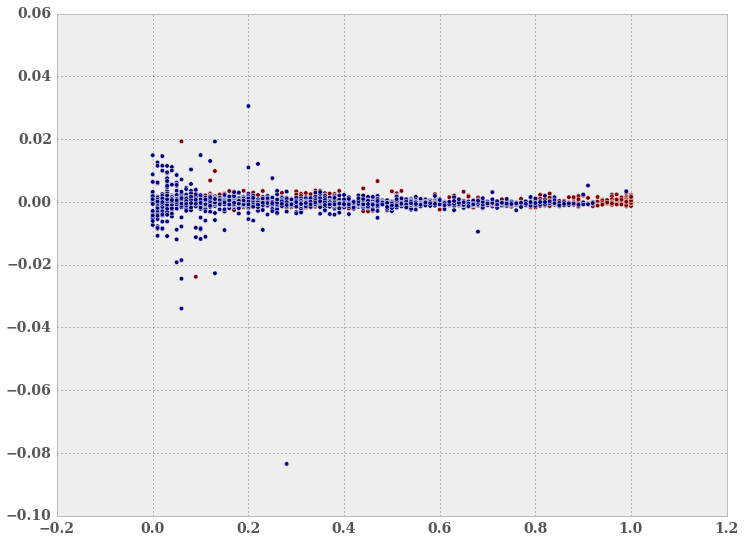

In [86]:
plt.scatter(a, f_poly.loc[:,1], c=y)

In [100]:
np.mean(np.abs(0==y))

0.76295807197094756

Точность 76% получается **при константном ответе**!!!

Практически ничего не добились в честной классификации...

0.743246842942


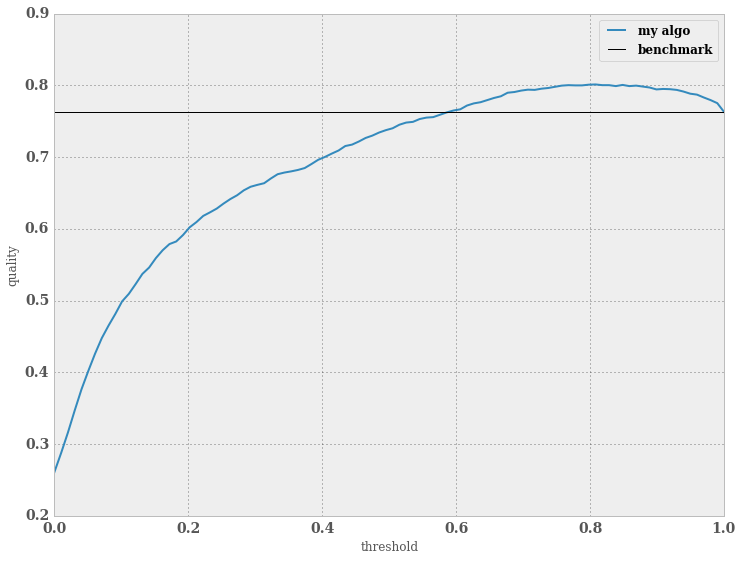

In [108]:
lsp = np.linspace(0, 1, 100)
q = [np.mean(np.abs((a>l) == y)) for l in lsp]
plt.plot(lsp, q, lw=2)
plt.plot(lsp, np.mean(np.abs(0 == y)) + lsp*0, 'k')
plt.xlabel('threshold')
plt.ylabel('quality')
plt.legend(['my algo', 'benchmark'])


from sklearn.metrics import roc_auc_score
#     fpr, tpr, _ = roc_curve(y_test, decision_function)

print (roc_auc_score(y, a))

Точность можно повысить регрессией и порогом!

## Разные наборы данных

"+" больше фолдов

число меток ~ 250, но это очень долго

лучше - fft_smooth

In [ ]:
# побольше фолдов
from sklearn.cross_validation import LabelKFold
# cv2 = LabelKFold(labels, n_folds=len(set(labels)))
cv2 = LabelKFold(labels, n_folds=20)

In [123]:
from sklearn.ensemble import RandomForestRegressor
from time import time

a = np.zeros(y.shape)
a1 = np.zeros(y.shape)
a2 = np.zeros(y.shape)
a3 = np.zeros(y.shape)

tm = time()
for itrain, itest in cv2:
    a[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1).fit(f_all.loc[itrain,:], y[itrain]).predict(f_all.loc[itest,:])
    a1[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1).fit(f_fft.loc[itrain,:], y[itrain]).predict(f_fft.loc[itest,:])
    a2[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1).fit(f_fft_smooth.loc[itrain,:], y[itrain]).predict(f_fft_smooth.loc[itest,:])
    a3[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1).fit(f_poly.loc[itrain,:], y[itrain]).predict(f_poly.loc[itest,:])
    print (time() - tm)

4.401251792907715
9.121521711349487
14.16381025314331
19.344106435775757
24.657410383224487
30.201727390289307
35.79704737663269
41.41236853599548
46.95068550109863
52.434999227523804
57.81330680847168
63.369624614715576
68.9609444141388
74.58826613426208
79.94857287406921
85.33288073539734
91.00020503997803
96.46451735496521
101.86382627487183
107.21913266181946


0.732200303984


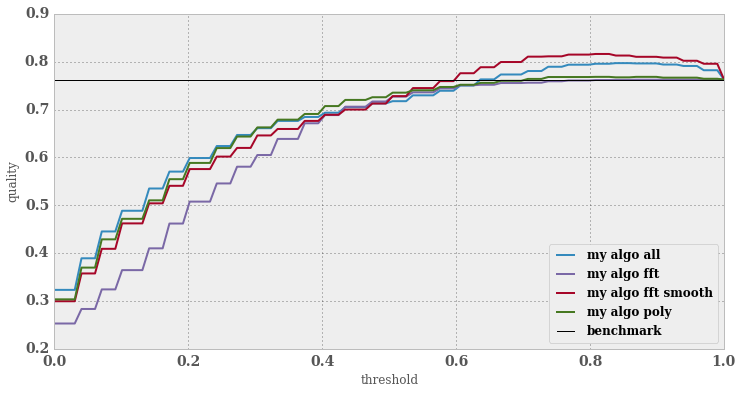

In [125]:
figsize(12, 6)
lsp = np.linspace(0, 1, 100)
plt.plot(lsp, [np.mean(np.abs((a>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, [np.mean(np.abs((a1>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, [np.mean(np.abs((a2>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, [np.mean(np.abs((a3>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, np.mean(np.abs(0 == y)) + lsp*0, 'k')
plt.xlabel('threshold')
plt.ylabel('quality')
plt.legend(['my algo all', 'my algo fft', 'my algo fft smooth', 'my algo poly', 'benchmark'], 0)


from sklearn.metrics import roc_auc_score
#     fpr, tpr, _ = roc_curve(y_test, decision_function)

print (roc_auc_score(y, a))

In [126]:
from sklearn.ensemble import RandomForestRegressor
from time import time

a = np.zeros(y.shape)
a1 = np.zeros(y.shape)
a2 = np.zeros(y.shape)
a3 = np.zeros(y.shape)

tm = time()
for itrain, itest in cv2:
    a[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1, max_features=1).fit(f_all.loc[itrain,:], y[itrain]).predict(f_all.loc[itest,:])
    a1[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1, max_features=1).fit(f_fft.loc[itrain,:], y[itrain]).predict(f_fft.loc[itest,:])
    a2[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1, max_features=1).fit(f_fft_smooth.loc[itrain,:], y[itrain]).predict(f_fft_smooth.loc[itest,:])
    a3[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1, max_features=1).fit(f_poly.loc[itrain,:], y[itrain]).predict(f_poly.loc[itest,:])
    print (time() - tm)

0.9320533275604248
1.8521058559417725
2.773158550262451
3.69421124458313
4.61626410484314
5.536316633224487
6.459369421005249
7.379422187805176
8.299474716186523
9.221527576446533
10.143580198287964
11.065632820129395
11.98468542098999
12.907738208770752
13.830790996551514
14.75084376335144
15.672896385192871
16.59494924545288
17.51700186729431
18.436054468154907


0.724017928064


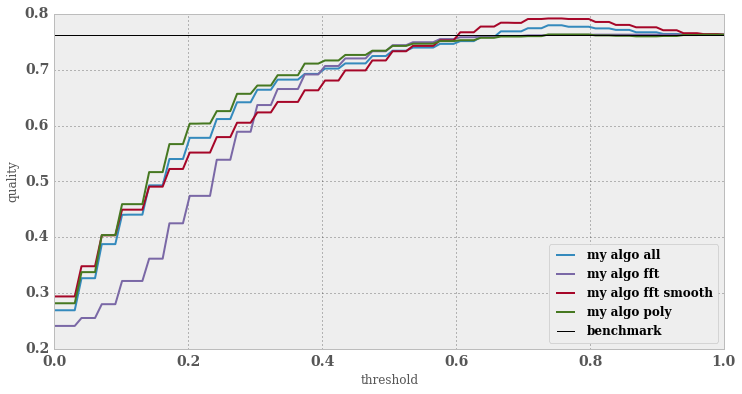

In [128]:
figsize(12, 6)
lsp = np.linspace(0, 1, 100)
plt.plot(lsp, [np.mean(np.abs((a>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, [np.mean(np.abs((a1>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, [np.mean(np.abs((a2>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, [np.mean(np.abs((a3>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, np.mean(np.abs(0 == y)) + lsp*0, 'k')
plt.xlabel('threshold')
plt.ylabel('quality')
plt.legend(['my algo all', 'my algo fft', 'my algo fft smooth', 'my algo poly', 'benchmark'], 0)


from sklearn.metrics import roc_auc_score
#     fpr, tpr, _ = roc_curve(y_test, decision_function)

print (roc_auc_score(y, a))

## подбор max_features

лучше - по умолчанию

In [130]:
f_fft_smooth.shape

(3029, 235)

In [132]:
from sklearn.ensemble import RandomForestRegressor
from time import time

a = np.zeros(y.shape)
a1 = np.zeros(y.shape)
a2 = np.zeros(y.shape)
a3 = np.zeros(y.shape)

tm = time()
for itrain, itest in cv2:
    a[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1).fit(f_fft_smooth.loc[itrain,:], y[itrain]).predict(f_fft_smooth.loc[itest,:])
    a1[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1, max_features=1).fit(f_fft_smooth.loc[itrain,:], y[itrain]).predict(f_fft_smooth.loc[itest,:])
    a2[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1, max_features=3).fit(f_fft_smooth.loc[itrain,:], y[itrain]).predict(f_fft_smooth.loc[itest,:])
    a3[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1, max_features=5).fit(f_fft_smooth.loc[itrain,:], y[itrain]).predict(f_fft_smooth.loc[itest,:])
    print (time() - tm)

2.2121267318725586
4.256243705749512
6.6293792724609375
9.065518617630005
11.606663942337036
14.085805892944336
16.624951124191284
19.14809536933899
21.742243766784668
24.169382572174072
26.594521284103394
29.128666162490845
31.547804594039917
34.15095329284668
36.64909625053406
39.18224120140076
41.667383432388306
44.05852007865906
46.59166502952576
49.062806367874146


0.730838282213


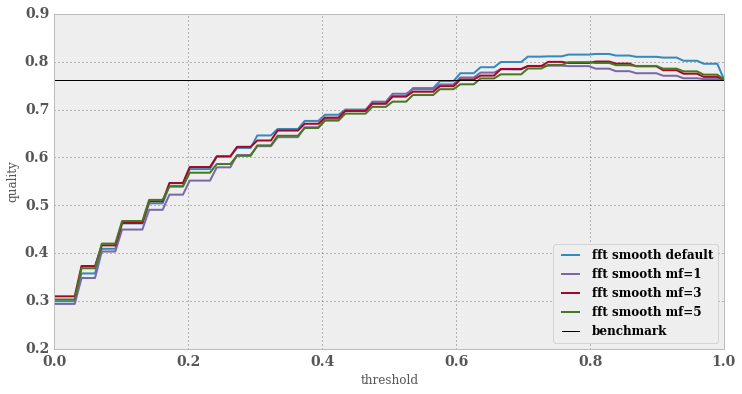

In [134]:
figsize(12, 6)
lsp = np.linspace(0, 1, 100)
plt.plot(lsp, [np.mean(np.abs((a>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, [np.mean(np.abs((a1>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, [np.mean(np.abs((a2>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, [np.mean(np.abs((a3>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, np.mean(np.abs(0 == y)) + lsp*0, 'k')
plt.xlabel('threshold')
plt.ylabel('quality')
plt.legend(['fft smooth default', 'fft smooth mf=1', 'fft smooth mf=3', 'fft smooth mf=5', 'benchmark'], 0)


from sklearn.metrics import roc_auc_score
#     fpr, tpr, _ = roc_curve(y_test, decision_function)

print (roc_auc_score(y, a))

### важности признаков

In [ ]:
rf = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1)
rf.fit(f_fft_smooth, y)
fi = rf.feature_importances_

<Container object of 235 artists>

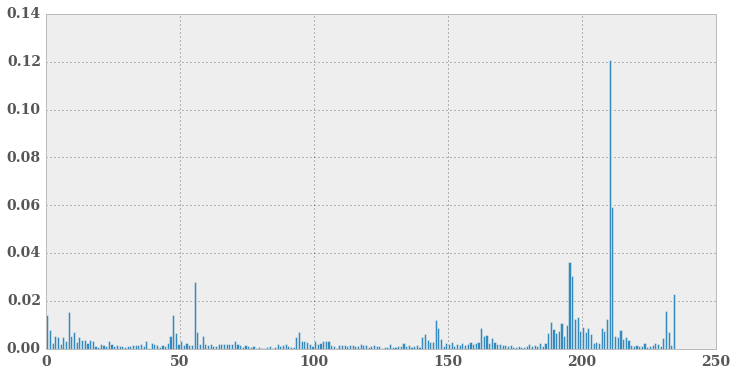

In [139]:
plt.bar(np.arange(len(fi)), fi)

## Обучение только на максимальном профиле

качество примерно такое же

In [144]:
235 - 47

188

In [143]:
235/5

47.0

In [147]:
f_fft_smooth.loc[:,188:235].shape

(3029, 47)

In [164]:
from sklearn.ensemble import RandomForestRegressor
from time import time

a = np.zeros(y.shape)
a1 = np.zeros(y.shape)
a2 = np.zeros(y.shape)
a3 = np.zeros(y.shape)

tm = time()
for itrain, itest in cv2:
    a[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1).fit(f_fft_smooth.loc[itrain,188:235], y[itrain]).predict(f_fft_smooth.loc[itest,188:235])
    a1[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1, max_features=1).fit(f_fft_smooth.loc[itrain,188:235], y[itrain]).predict(f_fft_smooth.loc[itest,188:235])
    a2[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1, max_features=3).fit(f_fft_smooth.loc[itrain,188:235], y[itrain]).predict(f_fft_smooth.loc[itest,188:235])
    a3[itest] = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1, max_features=5).fit(f_fft_smooth.loc[itrain,188:235], y[itrain]).predict(f_fft_smooth.loc[itest,188:235])
    print (time() - tm)

1.2320704460144043
2.37613582611084
3.5522031784057617
4.714269638061523
5.861335277557373
7.014401197433472
8.163466930389404
9.320533037185669
10.47559905052185
11.62866497039795
12.815732955932617
13.973799228668213
15.123864889144897
16.29393196105957
17.41999626159668
18.58006262779236
19.738128900527954
20.89519500732422
22.05126118659973
23.200326919555664


0.703731638319


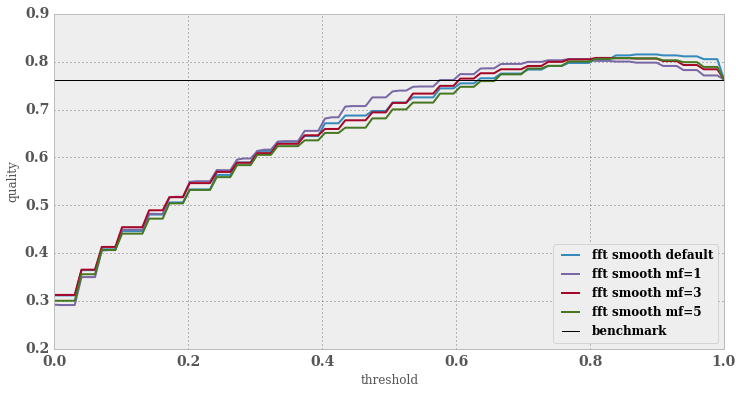

In [165]:
figsize(12, 6)
lsp = np.linspace(0, 1, 100)
plt.plot(lsp, [np.mean(np.abs((a>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, [np.mean(np.abs((a1>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, [np.mean(np.abs((a2>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, [np.mean(np.abs((a3>l) == y)) for l in lsp], lw=2)
plt.plot(lsp, np.mean(np.abs(0 == y)) + lsp*0, 'k')
plt.xlabel('threshold')
plt.ylabel('quality')
plt.legend(['fft smooth default', 'fft smooth mf=1', 'fft smooth mf=3', 'fft smooth mf=5', 'benchmark'], 0)


from sklearn.metrics import roc_auc_score
#     fpr, tpr, _ = roc_curve(y_test, decision_function)

print (roc_auc_score(y, a))

In [151]:
rf = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1)
rf.fit(f_fft_smooth.loc[:,188:235], y)
fi = rf.feature_importances_

<Container object of 47 artists>

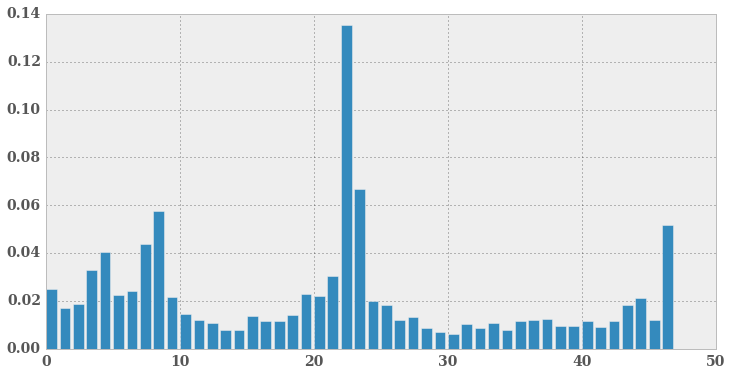

In [152]:
plt.bar(np.arange(47), fi)

Странно, что у последнего признака (артефактного) большой вес

In [166]:
max([np.mean(np.abs((a>l) == y)) for l in lsp])

0.81545064377682408

In [187]:
tmp = pd.DataFrame({'label':labels, 'y':y, 'a':a, 'ans': 0+(a>0.9)})
tmp['q'] = tmp.y == tmp.ans
print ('качество по сигналам = ' + str(tmp.q.mean()))
print ('качество по людям = ' + str(tmp.groupby('label')['q'].mean().mean()))

tmp[:3]

качество по сигналам = 0.813469792011
качество по людям = 0.590329376155


,a,ans,label,y,q
0,0.666667,0,1403,1,False
1,0.833333,0,1403,1,False
2,0.766667,0,1961,1,False


Честное качество по людям - очень низкое!

In [195]:
tmp = pd.DataFrame({'label':labels, 'y':y, 'a':a, 'ans': 0+(a>0.5)})
tmp['q'] = tmp.y == tmp.ans
print ('качество по сигналам = ' + str(tmp.q.mean()))
print ('качество по людям = ' + str(tmp.groupby('label')['q'].mean().mean()))

tmp[:3]

качество по сигналам = 0.71508748762
качество по людям = 0.630732119443


,a,ans,label,y,q
0,0.666667,1,1403,1,True
1,0.833333,1,1403,1,True
2,0.766667,1,1961,1,True


Можно повысить, если сделать "нормальный порог"

Но всё равно --- 63%